In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# matplotlib 시각화 결과를 jupyter notebook에서 바로 확인하기 위한 코드 작성 
%matplotlib inline

In [2]:
data = pd.read_csv("./laptop_price.csv")
laptop = data
# 데이터프레임의 크기를 확인합니다.
print(laptop.shape)

# 데이터프레임 상위 5개 값 확인
laptop.head()

(1303, 13)


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [4]:
# 컬럼별 결측치 한번 더 확인해보기
laptop.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [5]:
laptop = laptop.drop(['laptop_ID'],axis='columns') 

laptop = laptop.sort_values('Company')
laptop.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
651,Acer,A715-71G-59DH (i5-7300HQ/8GB/1TB/GeForce,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,1TB HDD,Nvidia GeForce GTX 1050,Linux,2.4kg,709.0
78,Acer,Aspire A515-51G-32MX,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7130U 2.7GHz,4GB,1TB HDD,Nvidia GeForce MX130,Windows 10,2.2kg,530.0
324,Acer,Aspire 5,Notebook,15.6,1366x768,AMD A12-Series 9720P 2.7GHz,8GB,256GB SSD,AMD Radeon RX 540,Windows 10,2.2kg,659.0
326,Acer,Aspire E5-575,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.23kg,549.0
371,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,128GB SSD,AMD Radeon R5,Windows 10,2.1kg,426.0


In [6]:
# 브랜드 종류 알아보기 => 19개
brand = laptop["Company"]

print(brand.value_counts())
print(brand.unique() , len(brand.unique()))

Lenovo       297
Dell         297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Xiaomi         4
Vero           4
Fujitsu        3
LG             3
Google         3
Chuwi          3
Huawei         2
Name: Company, dtype: int64
['Acer' 'Apple' 'Asus' 'Chuwi' 'Dell' 'Fujitsu' 'Google' 'HP' 'Huawei'
 'LG' 'Lenovo' 'MSI' 'Mediacom' 'Microsoft' 'Razer' 'Samsung' 'Toshiba'
 'Vero' 'Xiaomi'] 19


In [7]:
# 화면 크기 종류 알아보기 = > 18개 
inch = laptop["Inches"]

arr = inch.unique()
arr.sort()

print(arr, len(arr))
print("가장 작은 화면 크기(inch):", min(arr))
print("가장 큰 화면 크기(inch):", max(arr))

[10.1 11.3 11.6 12.  12.3 12.5 13.  13.3 13.5 13.9 14.  14.1 15.  15.4
 15.6 17.  17.3 18.4] 18
가장 작은 화면 크기(inch): 10.1
가장 큰 화면 크기(inch): 18.4


Text(0.5, 1.0, 'laptop Inches')

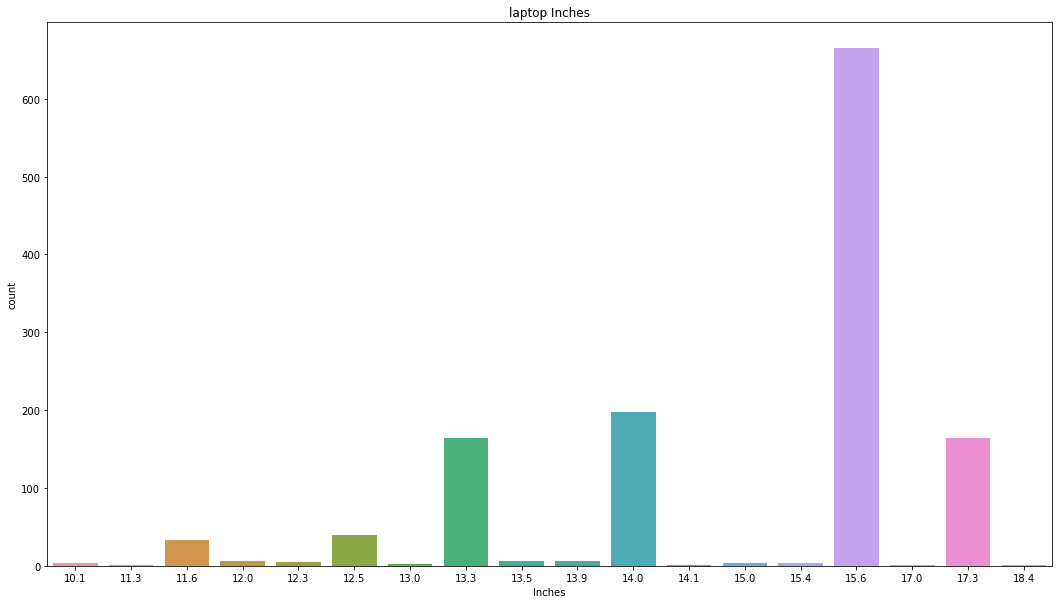

In [8]:
plt.figure(figsize=(18,10))

plt.subplot()
sns.countplot(data = laptop , x = "Inches")
plt.title("laptop Inches")

In [9]:
# 제품 종류 알아보기
product = laptop["Product"]

arr = product.unique()
len(arr)

618

In [10]:
type = laptop['TypeName']

print(type.unique(), len(type.unique()))
print(type.value_counts())

['Gaming' 'Notebook' '2 in 1 Convertible' 'Netbook' 'Ultrabook'
 'Workstation'] 6
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64


Text(0.5, 1.0, 'laptop Type')

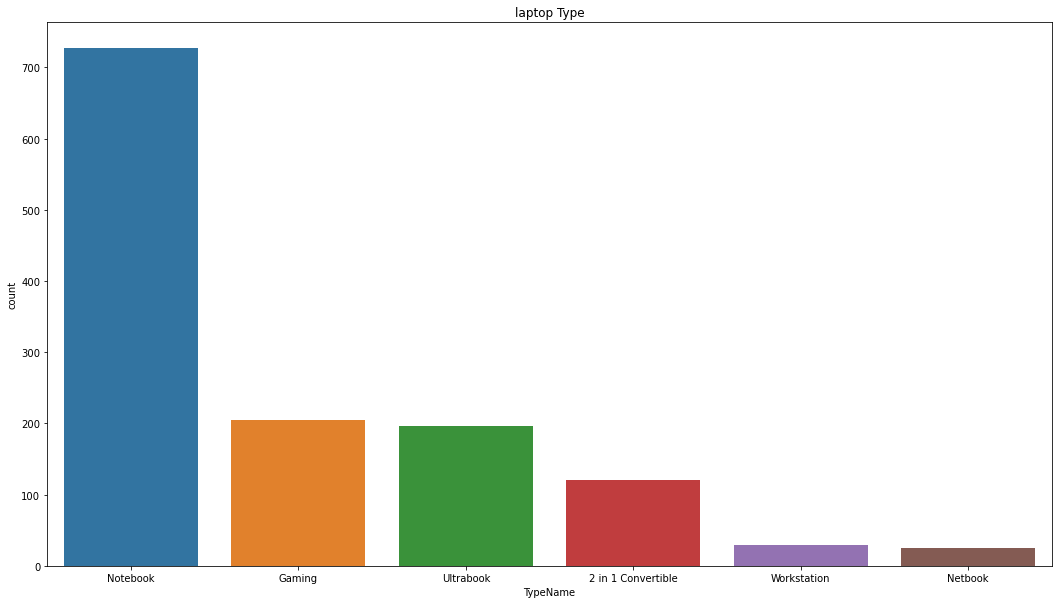

In [11]:
plt.figure(figsize=(18,10))

plt.subplot()
sns.countplot(data = laptop , x = "TypeName",order = laptop['TypeName'].value_counts().index)
plt.title("laptop Type")

In [12]:
# 제품 무게 알아보기
weight = laptop["Weight"]

arr = weight.unique()
print(len(arr))


print("가장 가벼운 무게(kg):", min(arr))
print("가장 무거운 무게(kg):", max(arr))

179
가장 가벼운 무게(kg): 0.69kg
가장 무거운 무게(kg): 4kg


In [13]:
#제품 가격 column (원화로 변경)

laptop['Price_euros'] = round(laptop['Price_euros']*1332.69)
laptop.rename(columns={'Price_euros':'Price'},inplace=True)
laptop

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
651,Acer,A715-71G-59DH (i5-7300HQ/8GB/1TB/GeForce,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,1TB HDD,Nvidia GeForce GTX 1050,Linux,2.4kg,944877.0
78,Acer,Aspire A515-51G-32MX,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7130U 2.7GHz,4GB,1TB HDD,Nvidia GeForce MX130,Windows 10,2.2kg,706326.0
324,Acer,Aspire 5,Notebook,15.6,1366x768,AMD A12-Series 9720P 2.7GHz,8GB,256GB SSD,AMD Radeon RX 540,Windows 10,2.2kg,878243.0
326,Acer,Aspire E5-575,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.23kg,731647.0
371,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,128GB SSD,AMD Radeon R5,Windows 10,2.1kg,567726.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1120,Vero,V131 (X5-Z8350/4GB/32GB/FHD/W10),Notebook,13.3,Full HD 1920x1080,Intel Atom X5-Z8350 1.44GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.35kg,261207.0
877,Xiaomi,Mi Notebook,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.28kg,1246065.0
184,Xiaomi,Mi Notebook,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Nvidia GeForce MX150,No OS,1.95kg,1597895.0
514,Xiaomi,Mi Notebook,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,256GB SSD,Nvidia GeForce MX150,No OS,1.95kg,1865699.0


In [15]:
price = laptop['Price']
arr = price.unique()
print(len(arr))
print("최저가 :", min(arr))
print("최고가 :", max(arr))

791
최저가 : 231888.0
최고가 : 8128076.0


In [18]:
laptop[price == max(arr)]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
196,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32GB,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49kg,8128076.0
